
===== SALES SUMMARY =====
  product  total_quantity  total_revenue
0   Shirt              16         7984.0
1   Shoes               7         9093.0
2   Watch               7         6993.0


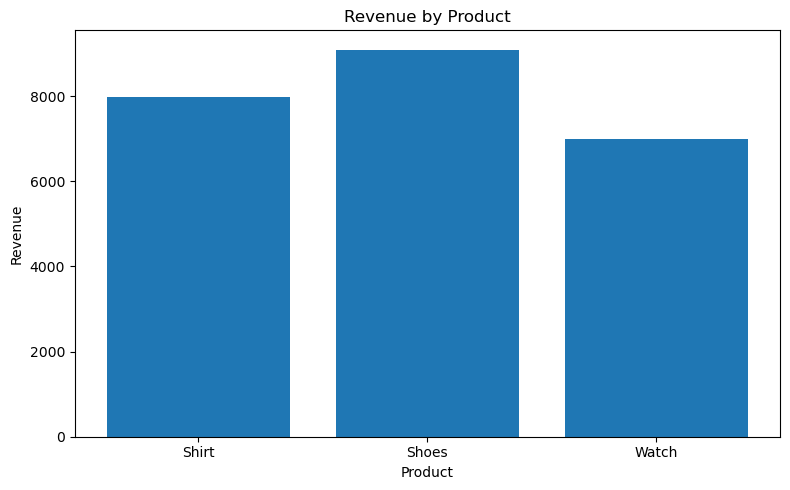

In [1]:
# ================================================
# TASK 7 – Basic Sales Summary using SQLite + Python
# ================================================

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# --------------------------------
# 1. CONNECT TO DATABASE
# --------------------------------
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# --------------------------------
# 2. CREATE SALES TABLE
# --------------------------------
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

# --------------------------------
# 3. INSERT SAMPLE DATA
# --------------------------------
cursor.execute("DELETE FROM sales")  # Clears old rows (optional)

sample_data = [
    ("Shirt", 10, 499),
    ("Shirt", 6, 499),
    ("Shoes", 4, 1299),
    ("Shoes", 3, 1299),
    ("Watch", 5, 999),
    ("Watch", 2, 999),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

# --------------------------------
# 4. RUN SQL QUERY
# --------------------------------
query = """
SELECT 
    product,
    SUM(quantity) AS total_quantity,
    SUM(quantity * price) AS total_revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)

# --------------------------------
# 5. PRINT RESULTS
# --------------------------------
print("\n===== SALES SUMMARY =====")
print(df)

# --------------------------------
# 6. BAR CHART (REVENUE)
# --------------------------------
plt.figure(figsize=(8, 5))
plt.bar(df["product"], df["total_revenue"])
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()

# Save the chart
plt.savefig("sales_chart.png")
plt.show()

# Close DB connection
conn.close()
